In [1]:
#3.Apply KNN algorithm for classification and regression

!pip install pandas numpy scikit-learn

In [3]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Data
data = {
    "S. No": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Experience": [1, 3, 5, 2, 10, 4, 0, 8, 1, 6],
    "Age": [25, 30, 35, 28, 45, 27, 23, 40, 22, 38],
    "Salary": [50000, 60000, 75000, 58000, 100000, 95000, 40000, 85000, 37000, 120000],
    "Purchased": ["Yes", "No", "Yes", "Yes", "No", "Yes", "No", "Yes", "No", "Yes"]
}
df = pd.DataFrame(data)

# Encode "Purchased" column
le = LabelEncoder()
df['Purchased'] = le.fit_transform(df['Purchased'])

# Features and target
X = df[['Experience', 'Age']]
y_class = df['Purchased']  # Classification target
y_reg = df['Salary']       # Regression target

# Split the data
X_train, X_test, y_class_train, y_class_test = train_test_split(X, y_class, test_size=0.3, random_state=1)
_, _, y_reg_train, y_reg_test = train_test_split(X, y_reg, test_size=0.3, random_state=1)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# KNN Classifier
knn_class = KNeighborsClassifier(n_neighbors=3)
knn_class.fit(X_train, y_class_train)
y_class_pred = knn_class.predict(X_test)
print("Classification Accuracy:", accuracy_score(y_class_test, y_class_pred))

# KNN Regressor
knn_reg = KNeighborsRegressor(n_neighbors=3)
knn_reg.fit(X_train, y_reg_train)
y_reg_pred = knn_reg.predict(X_test)
print("Regression Mean Squared Error:", mean_squared_error(y_reg_test, y_reg_pred))


Classification Accuracy: 0.3333333333333333
Regression Mean Squared Error: 521296296.2962962


In [5]:
#4.Demonstrate decision tree algorithm for a classification problem and perform
!pip install pandas scikit-learn

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Data
data = {
    "ID": [101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
    "Education_Level": ["High School", "Bachelor's", "Master's", "High School", "PhD", "Bachelor's", "Master's", "PhD", "High School", "Bachelor's"],
    "Work_Experience": [2, 5, 8, 1, 15, 4, 6, 10, 0, 7],
    "Age": [22, 25, 30, 21, 45, 26, 29, 40, 20, 35],
    "Hired": ["No", "Yes", "Yes", "No", "Yes", "Yes", "No", "Yes", "No", "Yes"]
}
df = pd.DataFrame(data)

# Encode categorical columns
le = LabelEncoder()
df['Education_Level'] = le.fit_transform(df['Education_Level'])
df['Hired'] = le.fit_transform(df['Hired'])

# Features and target
X = df[['Education_Level', 'Work_Experience', 'Age']]
y = df['Hired']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Decision Tree Classifier with Grid Search for Parameter Tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=3, scoring='accuracy')  # Reduced cv to 3
grid_search.fit(X_train, y_train)

# Best parameters and classifier
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_classifier = grid_search.best_estimator_

# Evaluate the optimized model
y_pred = best_classifier.predict(X_test)
print("Optimized Classification Accuracy:", accuracy_score(y_test, y_pred))

Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Optimized Classification Accuracy: 0.6666666666666666


In [13]:
#5 .Demonstrate decision tree algorithm for a regression problem

!pip install pandas scikit-learn

In [14]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Define the dataset
data = {
    "ID": [101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120],
    "Education_Level": [
        "High School", "Bachelor's", "Master's", "High School", "PhD", "Bachelor's", "Master's", "PhD", 
        "High School", "Bachelor's", "Master's", "PhD", "High School", "Master's", "PhD", "Bachelor's", 
        "High School", "PhD", "Bachelor's", "Master's"
    ],
    "Work_Experience": [2, 5, 8, 1, 15, 4, 6, 10, 0, 7, 12, 3, 9, 14, 11, 5, 7, 6, 2, 4],
    "Age": [22, 25, 30, 21, 45, 26, 29, 40, 20, 35, 32, 28, 34, 42, 39, 27, 31, 37, 33, 38],
    "Hired": ["No", "Yes", "Yes", "No", "Yes", "Yes", "No", "Yes", "No", "Yes", "Yes", "No", "Yes", "No", "Yes", "Yes", "No", "Yes", "No", "Yes"]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Encode categorical columns
le = LabelEncoder()
df['Education_Level'] = le.fit_transform(df['Education_Level'])
df['Hired'] = le.fit_transform(df['Hired'])

# Features and target
X = df[['Education_Level', 'Work_Experience', 'Age']]
y = df['Hired']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Define the parameter grid for GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV with DecisionTreeClassifier
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=5, scoring='accuracy')

# Fit the model with training data
grid_search.fit(X_train, y_train)

# Get the best parameters from GridSearchCV
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best classifier from the grid search
best_classifier = grid_search.best_estimator_

# Predict on the test set
y_pred = best_classifier.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Optimized Classification Accuracy:", accuracy)


Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Optimized Classification Accuracy: 0.6666666666666666


In [17]:
#6.Apply Random Forest algorithm for classification and regression

In [19]:
!pip install pandas scikit-learn

In [22]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Define the dataset
data = {
    "ID": [101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120],
    "Education_Level": [
        "High School", "Bachelor's", "Master's", "High School", "PhD", "Bachelor's", "Master's", "PhD", 
        "High School", "Bachelor's", "Master's", "PhD", "High School", "Master's", "PhD", "Bachelor's", 
        "High School", "PhD", "Bachelor's", "Master's"
    ],
    "Work_Experience": [2, 5, 8, 1, 15, 4, 6, 10, 0, 7, 12, 3, 9, 14, 11, 5, 7, 6, 2, 4],
    "Age": [22, 25, 30, 21, 45, 26, 29, 40, 20, 35, 32, 28, 34, 42, 39, 27, 31, 37, 33, 38],
    "Hired": ["No", "Yes", "Yes", "No", "Yes", "Yes", "No", "Yes", "No", "Yes", "Yes", "No", "Yes", "No", "Yes", "Yes", "No", "Yes", "No", "Yes"]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Encode categorical columns
le = LabelEncoder()
df['Education_Level'] = le.fit_transform(df['Education_Level'])
df['Hired'] = le.fit_transform(df['Hired'])

# Features and target for classification (Random Forest Classifier)
X_classification = df[['Education_Level', 'Work_Experience', 'Age']]
y_classification = df['Hired']

# Split the data into training and test sets for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_classification, y_classification, test_size=0.3, random_state=1)

# Apply Random Forest Classifier with GridSearchCV for parameter tuning
param_grid_class = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search_class = GridSearchCV(RandomForestClassifier(random_state=1), param_grid_class, cv=5, scoring='accuracy')
grid_search_class.fit(X_train_class, y_train_class)

# Best parameters for classification
best_params_class = grid_search_class.best_params_
print("Best Parameters (Classifier):", best_params_class)

# Best classifier
best_classifier = grid_search_class.best_estimator_

# Evaluate classifier
y_pred_class = best_classifier.predict(X_test_class)
classification_accuracy = accuracy_score(y_test_class, y_pred_class)
print("Optimized Classification Accuracy:", classification_accuracy)


# Features and target for regression (Random Forest Regressor)
X_regression = df[['Education_Level', 'Work_Experience']]
y_regression = df['Age']

# Split the data into training and test sets for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, y_regression, test_size=0.3, random_state=1)

# Apply Random Forest Regressor with GridSearchCV for parameter tuning
param_grid_reg = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search_reg = GridSearchCV(RandomForestRegressor(random_state=1), param_grid_reg, cv=5, scoring='neg_mean_squared_error')
grid_search_reg.fit(X_train_reg, y_train_reg)

# Best parameters for regression
best_params_reg = grid_search_reg.best_params_
print("Best Parameters (Regressor):", best_params_reg)

# Best regressor
best_regressor = grid_search_reg.best_estimator_

# Evaluate regressor
y_pred_reg = best_regressor.predict(X_test_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
print("Mean Squared Error (Regressor):", mse)


Best Parameters (Classifier): {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Optimized Classification Accuracy: 0.6666666666666666
Best Parameters (Regressor): {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Mean Squared Error (Regressor): 25.630466962962966


In [23]:
#7.Demonstrate Naïve Bayes Classification algorithm.

In [24]:
!pip install pandas scikit-learn

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Data
data = {
    "ID": [101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
    "Education_Level": ["High School", "Bachelor's", "Master's", "High School", "PhD", "Bachelor's", "Master's", "PhD", "High School", "Bachelor's"],
    "Work_Experience": [2, 5, 8, 1, 15, 4, 6, 10, 0, 7],
    "Age": [22, 25, 30, 21, 45, 26, 29, 40, 20, 35],
    "Hired": ["No", "Yes", "Yes", "No", "Yes", "Yes", "No", "Yes", "No", "Yes"]
}

# Create DataFrame
df = pd.DataFrame(data)

# Encode categorical columns
le = LabelEncoder()
df['Education_Level'] = le.fit_transform(df['Education_Level'])
df['Hired'] = le.fit_transform(df['Hired'])

# Features and target
X = df[['Education_Level', 'Work_Experience', 'Age']]
y = df['Hired']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Naïve Bayes Classifier
naive_bayes = GaussianNB()

# Train the model
naive_bayes.fit(X_train, y_train)

# Predict on test data
y_pred = naive_bayes.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Naïve Bayes Classification Accuracy:", accuracy)


Naïve Bayes Classification Accuracy: 0.6666666666666666


In [30]:
#8.Apply Support Vector algorithm for classification
!pip install pandas scikit-learn

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Updated Data (Customer data predicting whether they will buy a product)
data = {
    "ID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [22, 34, 29, 40, 35, 26, 33, 50, 23, 44],
    "Income": [45000, 60000, 55000, 80000, 75000, 30000, 65000, 90000, 47000, 72000],
    "Gender": ["Male", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male"],
    "Bought_Product": ["No", "Yes", "Yes", "No", "Yes", "No", "Yes", "Yes", "No", "Yes"]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Encode categorical columns
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Bought_Product'] = le.fit_transform(df['Bought_Product'])

# Features and target
X = df[['Age', 'Income', 'Gender']]  # Features
y = df['Bought_Product']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Support Vector Machine (SVM) Classifier
svm_classifier = SVC(kernel='linear', random_state=1)
svm_classifier.fit(X_train, y_train)

# Predict using the trained model
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Support Vector Machine Classification Accuracy:", accuracy)

Support Vector Machine Classification Accuracy: 0.6666666666666666


In [34]:
#9.Demonstrate simple linear regression algorithm for a regression problem
!pip install pandas scikit-learn matplotlib

Mean Squared Error: 0.0


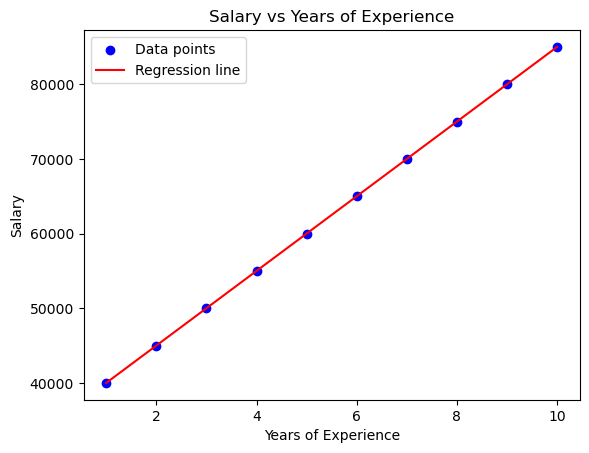

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Dataset: Years of Experience vs Salary
data = {
    "Years_Experience": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Salary": [40000, 45000, 50000, 55000, 60000, 65000, 70000, 75000, 80000, 85000]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Features and target
X = df[['Years_Experience']]  # Feature: Years of Experience
y = df['Salary']  # Target: Salary

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Simple Linear Regression model
linear_regressor = LinearRegression()

# Train the model
linear_regressor.fit(X_train, y_train)

# Predict using the trained model
y_pred = linear_regressor.predict(X_test)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plotting the regression line
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, linear_regressor.predict(X), color='red', label='Regression line')
plt.title("Salary vs Years of Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.show()


In [40]:
#10.Apply Logistic regression algorithm for a classification problem
!pip install pandas scikit-learn matplotlib seaborn

Accuracy: 100.00%
Confusion Matrix:
[[1 0]
 [0 1]]


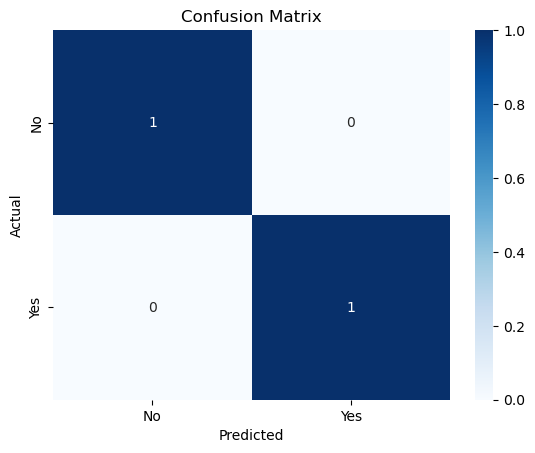

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset: Age, Annual Income, and Purchase (0 = No, 1 = Yes)
data = {
    "Age": [22, 25, 27, 30, 35, 40, 45, 50, 55, 60],
    "Annual_Income": [30000, 35000, 40000, 45000, 50000, 55000, 60000, 65000, 70000, 75000],
    "Purchased": [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]  # 0 = No, 1 = Yes
}

# Create DataFrame
df = pd.DataFrame(data)

# Features and target
X = df[['Age', 'Annual_Income']]  # Features: Age and Annual Income
y = df['Purchased']  # Target: Purchased (0 or 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train, y_train)

# Predict using the trained model
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)

# Plotting Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [44]:
#11.Demonstrate Multi-layer Perceptron algorithm for a classification problem
!pip install pandas scikit-learn matplotlib seaborn

Accuracy: 50.00%
Confusion Matrix:
[[1 0]
 [1 0]]


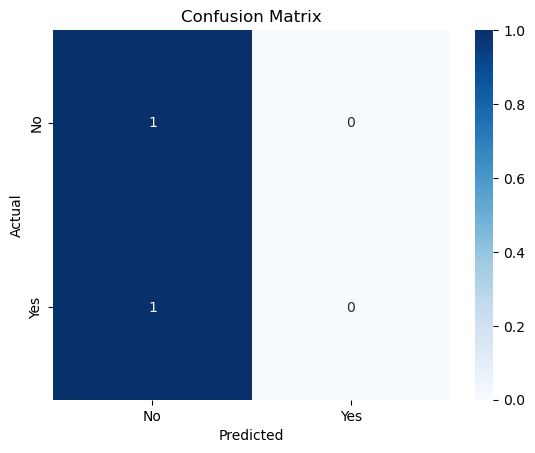

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset: Age, Annual Income, and Purchase (0 = No, 1 = Yes)
data = {
    "Age": [22, 25, 27, 30, 35, 40, 45, 50, 55, 60],
    "Annual_Income": [30000, 35000, 40000, 45000, 50000, 55000, 60000, 65000, 70000, 75000],
    "Purchased": [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]  # 0 = No, 1 = Yes
}

# Create DataFrame
df = pd.DataFrame(data)

# Features and target
X = df[['Age', 'Annual_Income']]  # Features: Age and Annual Income
y = df['Purchased']  # Target: Purchased (0 or 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Multi-layer Perceptron Classifier model
mlp = MLPClassifier(hidden_layer_sizes=(5,), max_iter=1000, random_state=42)

# Train the model
mlp.fit(X_train, y_train)

# Predict using the trained model
y_pred = mlp.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)

# Plotting Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [75]:
#12.Implement the K-means algorithm and apply it to the data you selected. Evaluate performance by measuring the sum of the Euclidean distance of each example fromits class center. Test the performance of the algorithm as a function of the parametersK.

!pip install pandas numpy scikit-learn matplotlib
!pip install --upgrade scikit-learn


C:\Users\loksa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1972: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\loksa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1972: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\loksa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1972: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\User

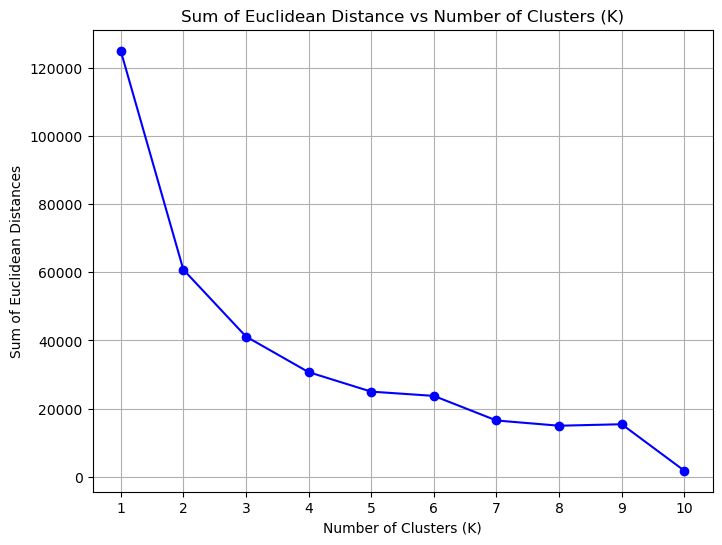

K = 1, Sum of Euclidean Distances = 125000.05
K = 2, Sum of Euclidean Distances = 60790.29
K = 3, Sum of Euclidean Distances = 41167.93
K = 4, Sum of Euclidean Distances = 30720.79
K = 5, Sum of Euclidean Distances = 25000.01
K = 6, Sum of Euclidean Distances = 23750.01
K = 7, Sum of Euclidean Distances = 16534.10
K = 8, Sum of Euclidean Distances = 15000.01
K = 9, Sum of Euclidean Distances = 15434.79
K = 10, Sum of Euclidean Distances = 1799.21


In [88]:
import pandas as pd
import numpy as np
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances_argmin_min

# Create a simple dataset
data = {
    "Age": [22, 25, 27, 30, 35, 40, 45, 50, 55, 60],
    "Annual_Income": [30000, 35000, 40000, 45000, 50000, 55000, 60000, 65000, 70000, 75000],
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Features
X = df[['Age', 'Annual_Income']]

# Function to calculate the sum of Euclidean distances of each example from its cluster center
def calculate_euclidean_distance(X, kmeans):
    centers = kmeans.cluster_centers_
    closest, _ = pairwise_distances_argmin_min(X, centers)
    distance = np.sum(np.linalg.norm(X.values - centers[closest], axis=1))
    return distance

# Test performance as a function of K
k_range = range(1, 11)  # Test K values from 1 to 10
distances = []

for k in k_range:
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=2048)  # Set batch_size
    kmeans.fit(X)

    # Calculate Euclidean distance sum for the current K
    distance = calculate_euclidean_distance(X, kmeans)
    distances.append(distance)

# Plot the sum of distances vs K
plt.figure(figsize=(8, 6))
plt.plot(k_range, distances, marker='o', linestyle='-', color='b')
plt.title('Sum of Euclidean Distance vs Number of Clusters (K)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Euclidean Distances')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Output the results
for k, dist in zip(k_range, distances):
    print(f"K = {k}, Sum of Euclidean Distances = {dist:.2f}")

In [81]:
#13. Demonstrate the use of Fuzzy C-Means Clustering
!pip install pandas numpy matplotlib 
!pip install fuzzy-c-means


  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
   ---------------------------------------- 0.0/431.8 kB ? eta -:--:--
   ------ --------------------------------- 71.7/431.8 kB 1.3 MB/s eta 0:00:01
   ------------------ --------------------- 194.6/431.8 kB 2.4 MB/s eta 0:00:01
   -------------------- ------------------- 225.3/431.8 kB 2.3 MB/s eta 0:00:01
   ---------------------------------------- 431.8/431.8 kB 2.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/2.0 MB 7.9 MB/s eta 0:00:01
   ----------- ---------------------------- 0.6/2.0 MB 5.9 MB/s eta 0:00:01
   ------------ --------------------------- 0.6/2.0 MB 6.5 MB/s eta 0:00:01
   ------------- -------------------------- 0.7/2.0 MB 3.9 MB/s eta 0:00:01
   ------------------- -------------------- 1.0/2.0 MB 4.5 MB/s eta 0:00:01
   -------------------------- ------------- 1.3/2.0 MB 4.9 MB/s eta 0:00:01
   -------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gradio 4.44.0 requires typer<1.0,>=0.12; sys_platform != "emscripten", but you have typer 0.9.4 which is incompatible.


Fuzzy Membership Matrix:
[[9.35742891e-01 6.42571093e-02]
 [9.80319121e-01 1.96808794e-02]
 [9.99346010e-01 6.53990051e-04]
 [9.30246589e-01 6.97534109e-02]
 [6.83397352e-01 3.16602648e-01]
 [3.16595320e-01 6.83404680e-01]
 [6.97502227e-02 9.30249777e-01]
 [6.53768021e-04 9.99346232e-01]
 [1.96817113e-02 9.80318289e-01]
 [6.42581501e-02 9.35741850e-01]]

Cluster Centers:
[[2.71088222e+01 3.93436729e+04]
 [4.24654402e+01 6.56562182e+04]]

Predicted Cluster Labels:
[0 0 0 0 0 1 1 1 1 1]


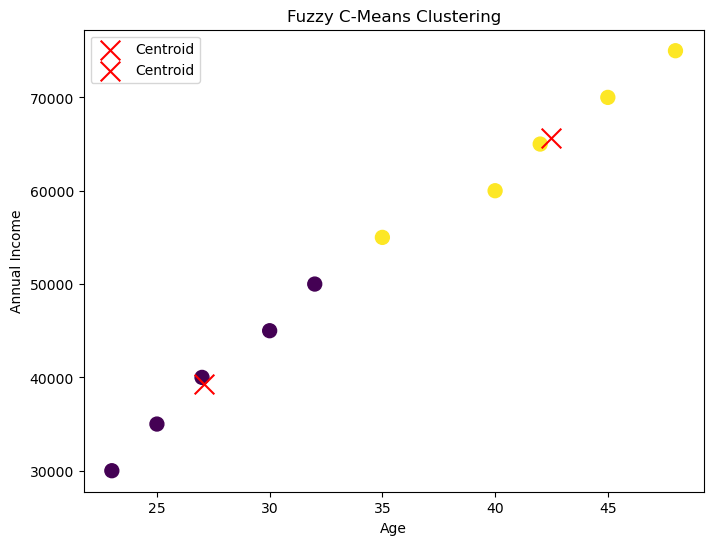

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fcmeans import FCM

# Create a simple synthetic dataset
data = {
    'Age': [23, 25, 27, 30, 32, 35, 40, 42, 45, 48],
    'Annual_Income': [30000, 35000, 40000, 45000, 50000, 55000, 60000, 65000, 70000, 75000]
}

df = pd.DataFrame(data)

# Features for clustering
X = df[['Age', 'Annual_Income']].values

# Apply Fuzzy C-Means Clustering
fcm = FCM(n_clusters=2)  # We are trying to divide data into 2 clusters
fcm.fit(X)

# Get the fuzzy membership matrix
membership_matrix = fcm.u
print("Fuzzy Membership Matrix:")
print(membership_matrix)

# Get the cluster centers
cluster_centers = fcm.centers
print("\nCluster Centers:")
print(cluster_centers)

# Get the predicted cluster labels (most likely cluster for each data point)
labels = fcm.predict(X)
print("\nPredicted Cluster Labels:")
print(labels)

# Plot the results
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', s=100)

# Plot the cluster centers
for center in cluster_centers:
    plt.scatter(center[0], center[1], c='red', marker='x', s=200, label='Centroid')

plt.title("Fuzzy C-Means Clustering")
plt.xlabel("Age")
plt.ylabel("Annual Income")
plt.legend()
plt.show()

In [96]:
#14. Demonstrate the use of Expectation Maximization based clustering algorithm
    !pip install numpy pandas matplotlib scikit-learn
    
    !pip install --upgrade scikit-learn
    
    !pip install --upgrade scipy numpy



  Using cached scipy-1.14.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------------ ------------------------- 20.5/60.8 kB 640.0 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/60.8 kB 650.2 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 538.3 kB/s eta 0:00:00
Using cached scipy-1.14.1-cp312-cp312-win_amd64.whl (44.5 MB)
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/12.6 MB 2.3 MB/s eta 0:00:06
    --------------------------------------- 0.2/12.6 MB 2.5 MB/s eta 0:00:05
   - -------------------------------------- 0.4/12.6 MB 2.5 MB/s eta 0:00:05
   -- ------------------------------------- 0.7/12.6 MB 3.4 MB/s eta 0:00:04
   -- ------------------------------------- 0.9/12.6 MB 4.1 MB/s eta 0:00:03
   --- ------------------------------------ 1.2/12.6 MB 4.6 MB/s eta 0:00:03
   ---- ---------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.2.1 which is incompatible.
fuzzy-c-means 1.7.2 requires numpy<2.0.0,>=1.21.1, but you have numpy 2.2.1 which is incompatible.
gradio 4.44.0 requires typer<1.0,>=0.12; sys_platform != "emscripten", but you have typer 0.9.4 which is incompatible.
numba 0.59.1 requires numpy<1.27,>=1.22, but you have numpy 2.2.1 which is incompatible.
pywavelets 1.5.0 requires numpy<2.0,>=1.22.4, but you have numpy 2.2.1 which is incompatible.
streamlit 1.32.0 requires numpy<2,>=1.19.3, but you have numpy 2.2.1 which is incompatible.


In [ ]:
!pip uninstall scikit-learn
!pip install scikit-learn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Generate synthetic data: Two Gaussian blobs
np.random.seed(0)

# Create data for two clusters
cluster_1 = np.random.normal(loc=[5, 5], scale=1.0, size=(100, 2))
cluster_2 = np.random.normal(loc=[10, 10], scale=1.0, size=(100, 2))

# Combine the clusters into one dataset
X = np.vstack([cluster_1, cluster_2])

# Visualize the synthetic data
plt.scatter(X[:, 0], X[:, 1], c='blue', s=30)
plt.title("Synthetic Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Apply the Gaussian Mixture Model (GMM) using EM algorithm
gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=0)

# Fit the model
gmm.fit(X)

# Predict the cluster labels
labels = gmm.predict(X)

# Get the means of the Gaussian distributions
means = gmm.means_
print("\nGaussian Component Means (Centers):")
print(means)

# Get the covariance matrices for each component
covariances = gmm.covariances_
print("\nCovariance Matrices:")
print(covariances)

# Visualize the clustering result
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', s=50)
plt.scatter(means[:, 0], means[:, 1], c='red', marker='x', s=200, label="Centroids")
plt.title("EM Clustering - GMM")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()